Projeto 3 - Modelagem de um sistema mecânico

Grupo 10 - Luca Melão, Thiago Youssef e Pedro Paulo Tibério

Turma B

In [25]:
# Importa as bibliotecas necessária para o código
import numpy as np
import matplotlib.pyplot as plt
from math import *
from scipy.integrate import odeint

In [26]:
# Implementação do nosso modelo para o salto de bungee jumping

# Validação do modelo pelo salto de Curtis Rivers

# Parâmetros do Salto de Curtis 
m = 90 # Massa de Curtis em kg (com o equipamento)
h = 1.80 # Altura de Curtis em m
𝜌 = 0.8 # Densidade do ar à 4630m de altura, em kg/m3
g = 9.8 # Aceleração da gravidade, em m/s2
Cd = 0.5 # Coeficiente de penetração aerodinâmica
A = 0.0425 # Área da secção transversal da pessoa
l0 = 10 # Comprimento inicial da corda (m)
D = 74 # Damping 

# Condições iniciais
y = -l0
vy = 0

# Listas que serão usadas no ODEINT
dt = 1e-3
ls_tempo = np.arange(0, 20, dt)
cond_inicial = [y,vy]

# Função que implementa o nosso modelo
def modelo1(X,t):
    # Extrai os valores da lista X
    y = X[0]
    vy = X[1]
    # Novos parâmetros passados para o modelo
    x = (y-l0)
    k = 350
    # Equação diferencial da posição no tempo
    dhdt = vy
    # Equação diferencial da velocidade no tempo
    # Adotamos o referencial em y crescendo para baixo, então se vy>0 a resistência do ar atua para cima, e  vice-versa
    if vy > 0:  
        Ar = (0.5*𝜌*Cd*A*vy**2) 
    else:
        Ar = (-(0.5*𝜌*Cd*A*vy**2))
    # O damping e a força elástica passam a atuar apenas depois que o comprimento inicial da corda é atingido
    if y < 0:
        dvydt = g - Ar/m
    else:
        dvydt = g - Ar/m - (k*x)/m - (D*vy)/m
    # Agrupa as duas equações diferenciais em uma lista e retorna a mesma
    derivadas = [dhdt,dvydt]
    return derivadas

# Aplica o odeint 
result = odeint(modelo1,cond_inicial,ls_tempo)
# Armazena a posição em y
h = result[:,0]

C:\Users\lucam\anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


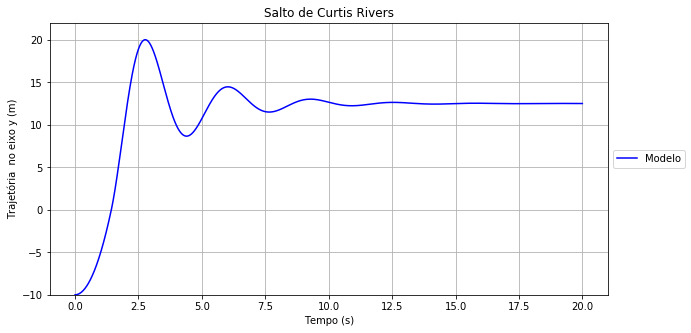

C:\Users\lucam\anaconda3\lib\site-packages\ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


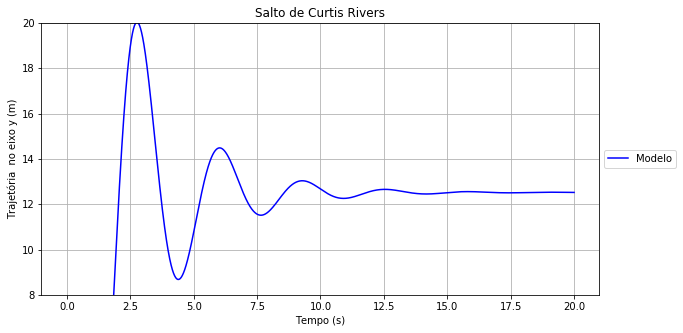

C:\Users\lucam\anaconda3\lib\site-packages\ipykernel_launcher.py:30: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


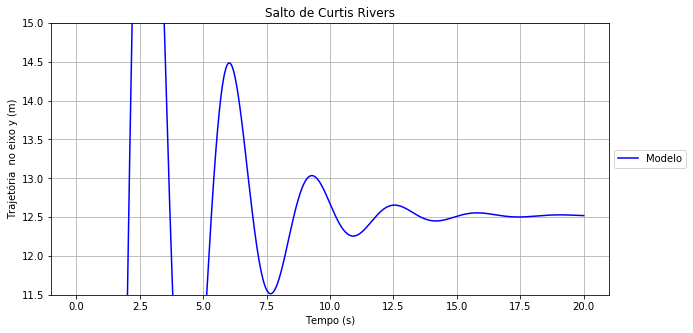

A CORDA ESTICOU 20.032939241805035 METROS


In [27]:
# Gráfico de validação

# Plotando gráfico do modelo 
fig = plt.figure(figsize=(10,5))
plt.title("Salto de Curtis Rivers")
ax = fig.add_subplot(111)
plt.plot(ls_tempo, h, 'b-', label="Modelo")
plt.xlabel("Tempo (s)")
plt.ylabel("Trajetória  no eixo y (m)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
ax.set_ylim(-10, 22)
plt.show()

# Plotando gráfico da validação ampliado
fig = plt.figure(figsize=(10,5))
plt.title("Salto de Curtis Rivers")
ax = fig.add_subplot(111)
plt.plot(ls_tempo, h, 'b-', label="Modelo")
plt.xlabel("Tempo (s)")
plt.ylabel("Trajetória  no eixo y (m)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
ax.set_ylim(8, 20)
plt.show()

# Plotando gráfico da validação mais ampliado
fig = plt.figure(figsize=(10,5))
plt.title("Salto de Curtis Rivers")
ax = fig.add_subplot(111)
plt.plot(ls_tempo, h, 'b-', label="Modelo")
plt.xlabel("Tempo (s)")
plt.ylabel("Trajetória  no eixo y (m)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
ax.set_ylim(11.5, 15)
plt.show()

stretch = max(h)
print('A CORDA ESTICOU {0} METROS'.format(stretch))

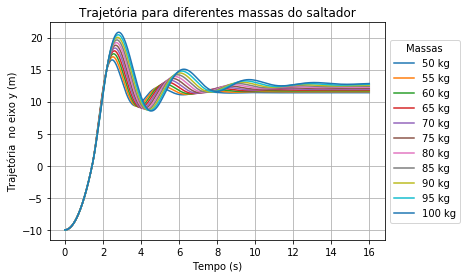

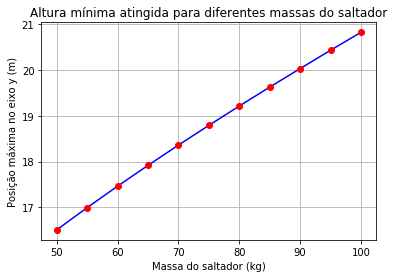

In [28]:
# Gráfico conclusivo e pergunta a ser respondida pelo modelo
# Qual a altura máxima atinginda no salto para diferentes valores de massa do saltador?

# Parâmetros do nosso modelo (em uma situação normal)
g = 9.8 # Aceleração da gravidade, em m/s2
m = 80 # Massa da pessoa, em kg
𝜌 = 1.0 # Densidade do ar, em kg/m3
# Cd = 0.5 # Coeficiente de penetração aerodinâmica
# h = 1.70 # Altura de uma pessoa em média (m)
# A = 0.0425 # Área da secção transversal da pessoa
# l0 = 10 # Comprimento inicial da corda
# D = 74 # Damping

# Condições iniciais de Y e Vy são as mesmas

# Declara a lista de massas e de tempo
lista_massas = np.arange(50, 101, 5)
ls_tempo = np.arange(0, 16, dt)

# Função que implementa nosso modelo para o gráfico conclusivo
def modelo2(X, t, m):
    # Extrai os valores da lista X
    y = X[0]
    vy = X[1]
    # Novos parâmetros passados para o modelo
    x = (y-l0)
    k = 350
    # Equação diferencial da posição no tempo
    dhdt = vy
    # Equação diferencial da velocidade no tempo
    # Adotamos o referencial em y crescendo para baixo, então se vy>0 a resistência do ar atua para cima, e  vice-versa
    if vy > 0:  
        Ar = (0.5*𝜌*Cd*A*vy**2) 
    else:
        Ar = (-(0.5*𝜌*Cd*A*vy**2))
    # O damping e a força elástica passam a atuar apenas depois que o comprimento inicial da corda é atingido
    if y < 0:
        dvydt = g - Ar/m
    else:
        dvydt = g - Ar/m - (k*x)/m - (D*vy)/m
    # Agrupa as duas equações diferenciais em uma lista e retorna a mesma
    derivadas = [dhdt,dvydt]
    return derivadas

# Plotando gráfico da trajetória para diferentes massas do saltador
# Declara a lista que irá armazenar as alturas máximas no eixo Y atingidas no salto para cada uma das massas
ls_max = []
for massa in lista_massas:
    Solucao = odeint(modelo2,cond_inicial, ls_tempo, args=(massa,))    
    # Adiciona a altura máxima no eixo Y à lista
    ls_max.append(max(Solucao[:,0]))
    # Plota uma curva para cada trajetórias em Y em função do tempo
    plt.plot(ls_tempo, Solucao[:,0], label = "{0} kg".format(massa))

# Configura o gráfico
plt.title('Trajetória para diferentes massas do saltador')
plt.xlabel('Tempo (s)')
plt.ylabel('Trajetória  no eixo y (m)')
plt.grid(True)
plt.legend(loc='center left',title = 'Massas', bbox_to_anchor=(1, 0.5))
plt.show()
    
# Plota o gráfico conclusivo
plt.title('Altura mínima atingida para diferentes massas do saltador')   
plt.plot(lista_massas,ls_max, 'b')
plt.plot(lista_massas,ls_max, 'ro')
plt.xlabel('Massa do saltador (kg)')
plt.ylabel('Posição máxima no eixo y (m)')
plt.grid(True)
plt.show()
